In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA


from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# Présentation des données utilisées:

In [139]:
import pandas as pd

df = pd.read_csv('/content/db.csv')



## Source
https://archive.ics.uci.edu/dataset/109/wine


## Features
Alcohol
Malic acid
Ash
Alcalinity of ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280/OD315 of diluted wines
Proline

In [140]:
print(df.head())  # Afficher les 5 premières lignes


   Class  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      1    14.23        1.71  2.43          15.6        127           2.80   
1      1    13.20        1.78  2.14          11.2        100           2.65   
2      1    13.16        2.36  2.67          18.6        101           2.80   
3      1    14.37        1.95  2.50          16.8        113           3.85   
4      1    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40  

## nature

In [141]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


# EDA

## Prétraitement
Transformation des donnéess, pour passer à un problème de clustering
Supprimer l'attribut class

In [142]:
df = df.iloc[:, 1:]

print(df.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

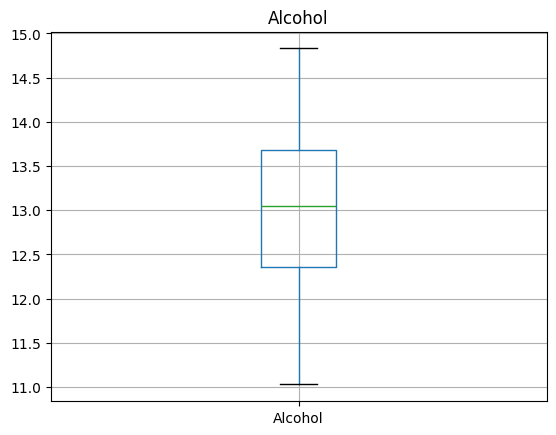

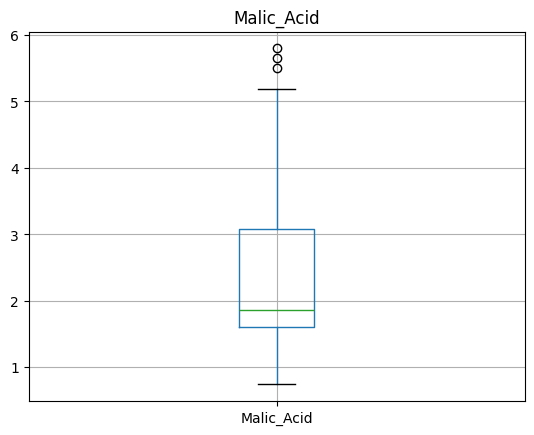

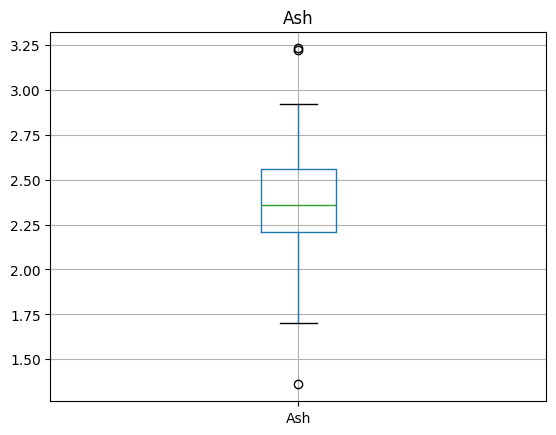

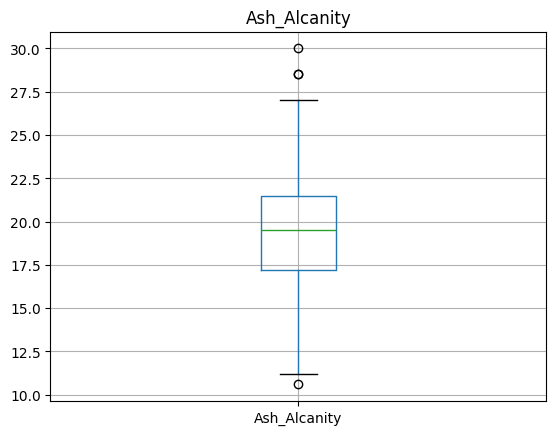

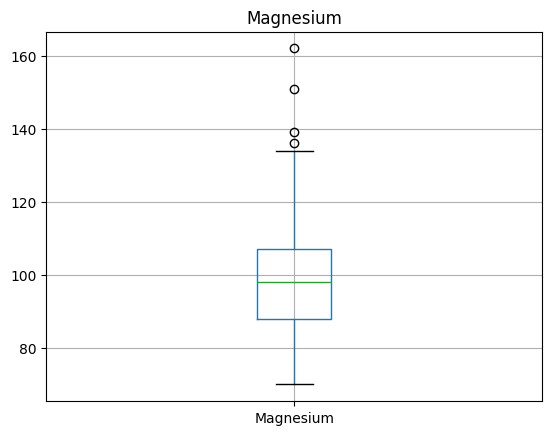

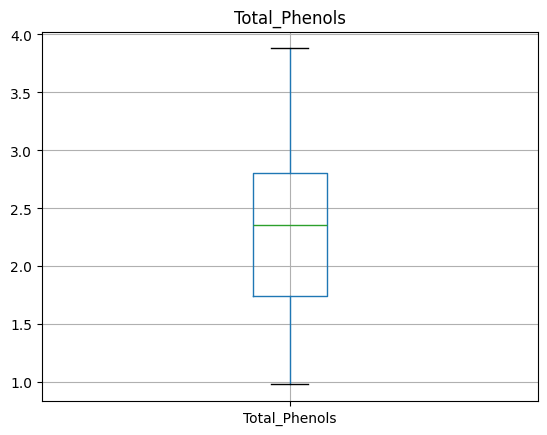

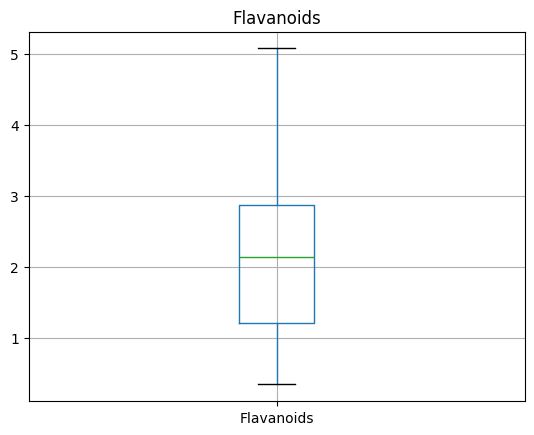

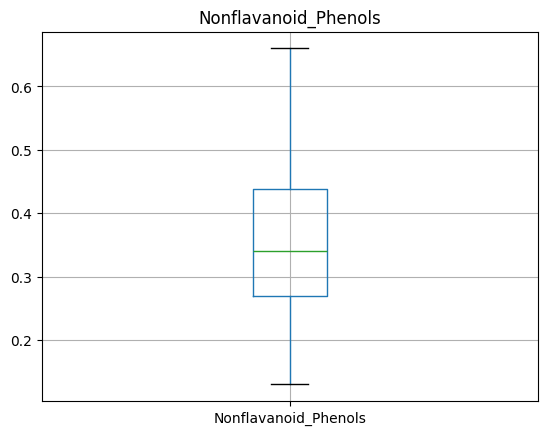

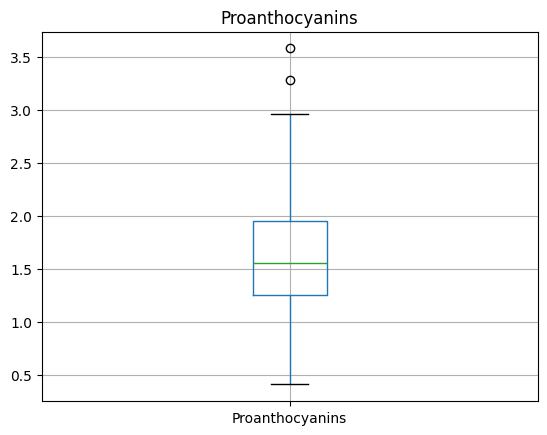

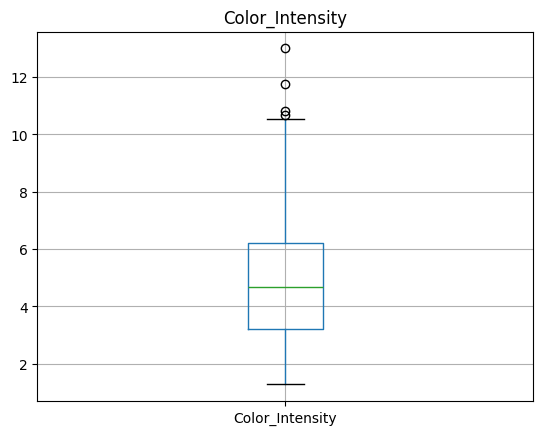

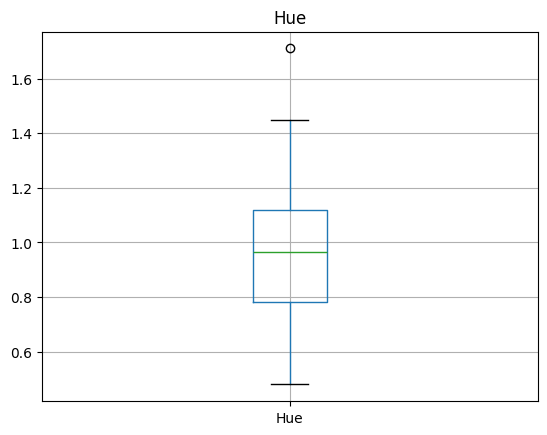

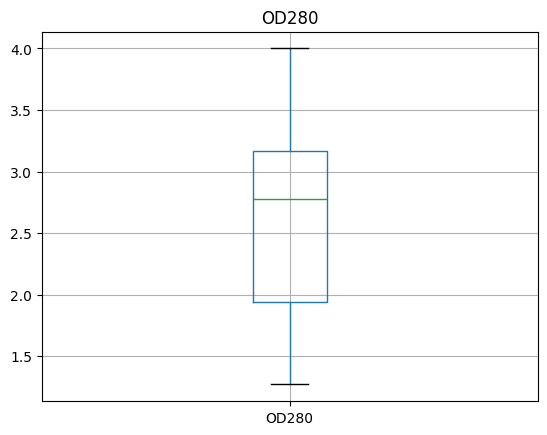

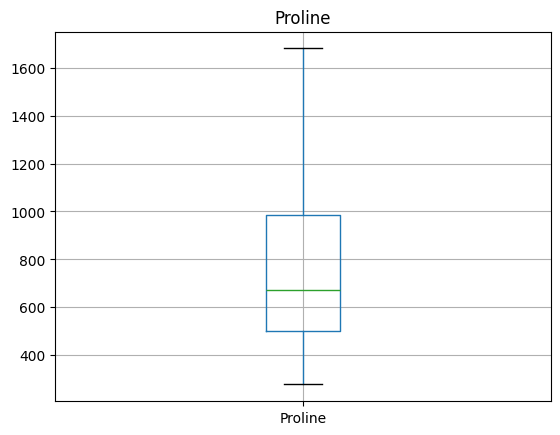

In [143]:

import matplotlib
import matplotlib.pyplot as plt
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is not of object type (i.e., numeric)
        plt.figure()
        df.boxplot([col])
        plt.title(col)
        plt.show()  # This line will display each plot

In [144]:
import numpy as np
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is numeric
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)

        # To find IQR
        iqr = Q3 - Q1

        # To find lower bound and upper bound
        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr

        # Capping the outliers
        df[col] = np.where(df[col] > upper_bound, upper_bound,
                           np.where(df[col] < lower_bound, lower_bound, df[col]))

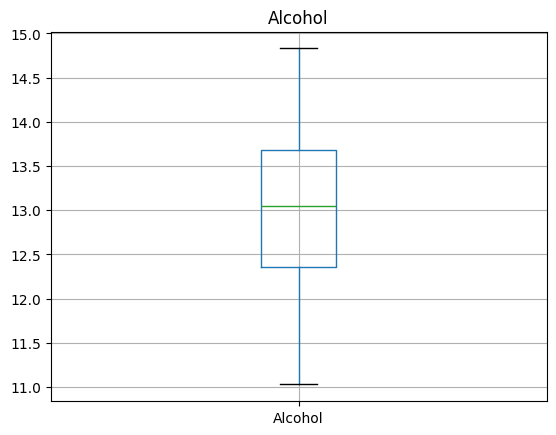

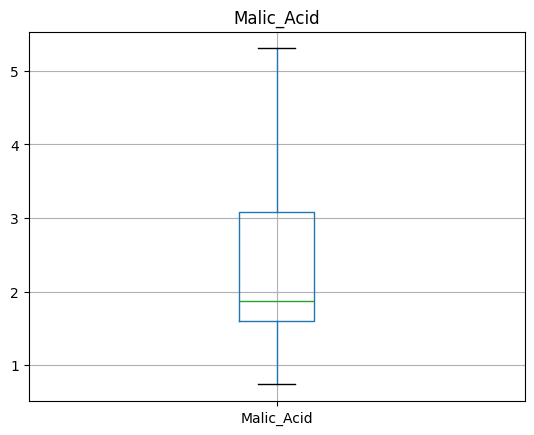

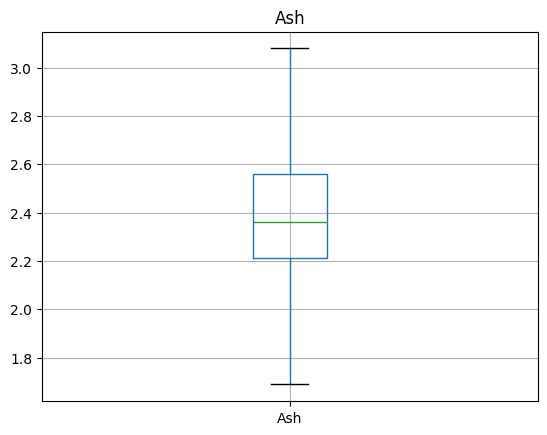

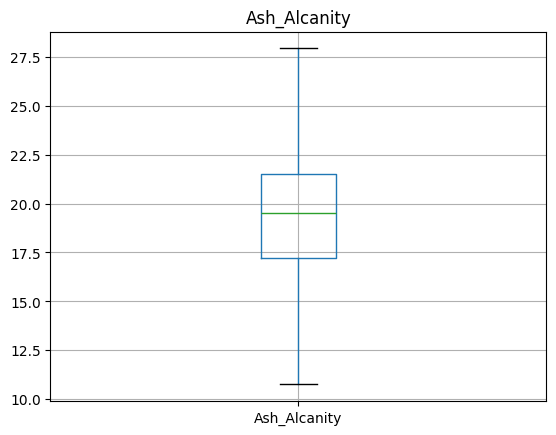

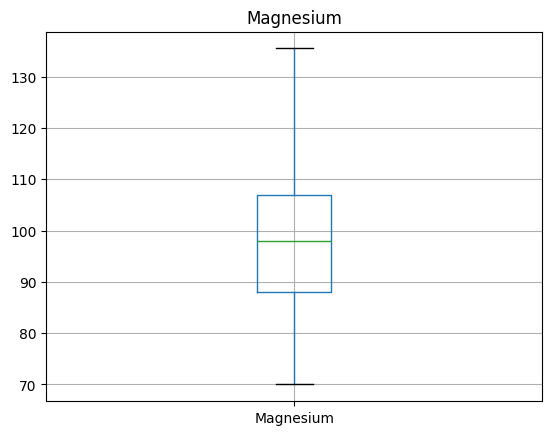

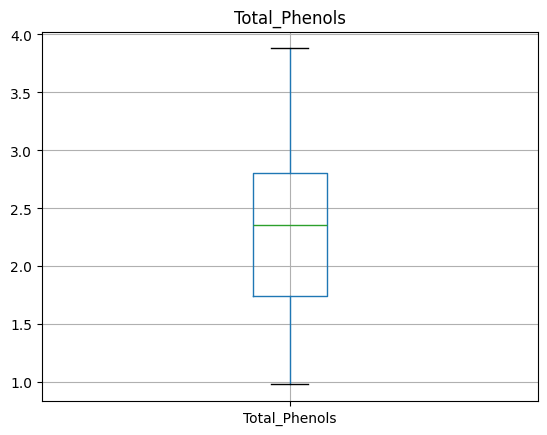

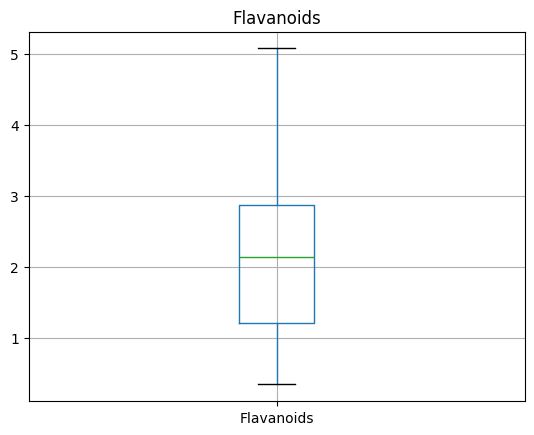

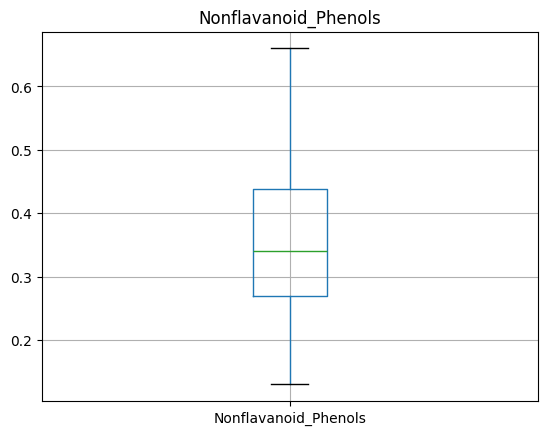

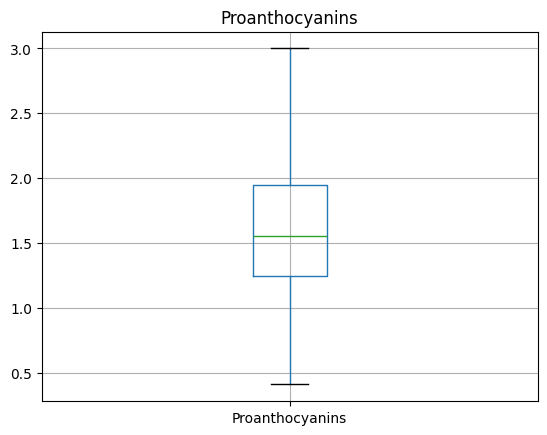

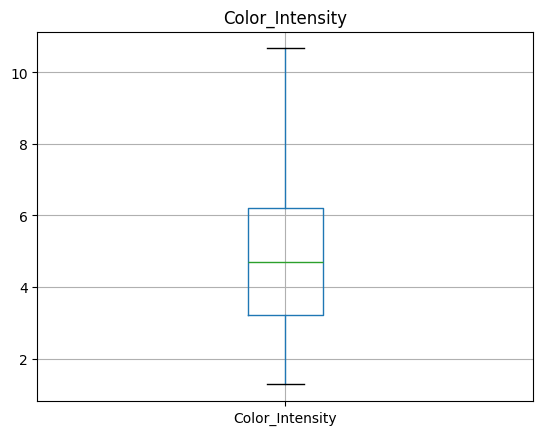

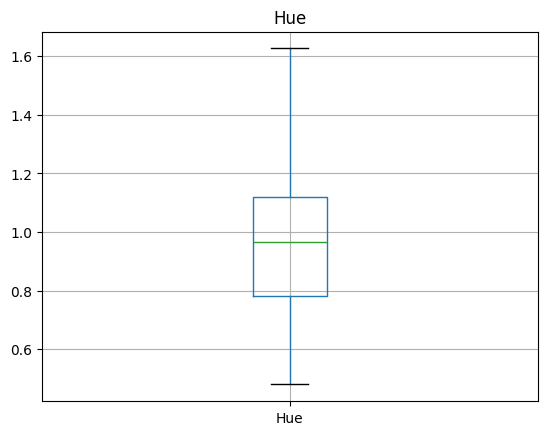

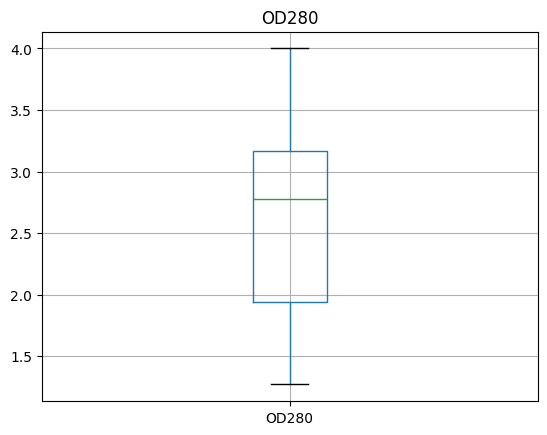

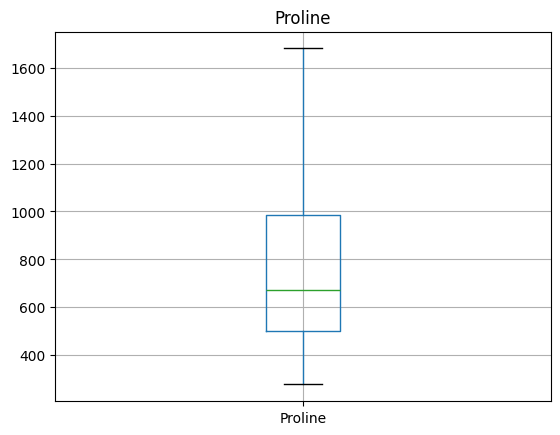

In [145]:
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is not of object type (i.e., numeric)
        plt.figure()
        df.boxplot([col])
        plt.title(col)
        plt.show()  # This line will display each plot

## Statistique descriptives

### Univariée

In [146]:

# Univariate descriptive statistics
univariate_stats = df.describe().T

# Ajout de skewness et kurtosis
univariate_stats['Skewness'] = df.skew()
univariate_stats['Kurtosis'] = df.kurtosis()

from IPython.display import display

# Display the univariate statistics
display(univariate_stats)


,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
Alcohol,178.0,13.000618,0.811827,11.03000,12.3625,13.050,13.6775,14.83000,-0.051482,-0.852500
Malic_Acid,178.0,2.330435,1.100173,0.74000,1.6025,1.865,3.0825,5.30250,0.969169,-0.001516
Ash,178.0,2.366721,0.263705,1.68875,2.2100,2.360,2.5575,3.07875,-0.149764,0.187067
Ash_Alcanity,178.0,19.478090,3.287757,10.75000,17.2000,19.500,21.5000,27.95000,0.114798,0.197885
Magnesium,178.0,99.483146,13.414186,70.00000,88.0000,98.000,107.0000,135.50000,0.670809,0.107683
Total_Phenols,178.0,2.295112,0.625851,0.98000,1.7425,2.355,2.8000,3.88000,0.086639,-0.835627
Flavanoids,178.0,2.029270,0.998859,0.34000,1.2050,2.135,2.8750,5.08000,0.025344,-0.880382
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13000,0.2700,0.340,0.4375,0.66000,0.450151,-0.637191
Proanthocyanins,178.0,1.586067,0.558153,0.41000,1.2500,1.555,1.9500,3.00000,0.350811,-0.010040
Color_Intensity,178.0,5.038146,2.260881,1.28000,3.2200,4.690,6.2000,10.67000,0.735453,-0.147862


Malic Acid and Magnesium show a positive skew, indicating a right-skewed distribution.

Ash and OD280 have positive kurtosis, indicating a sharper peak.

### Bivariée

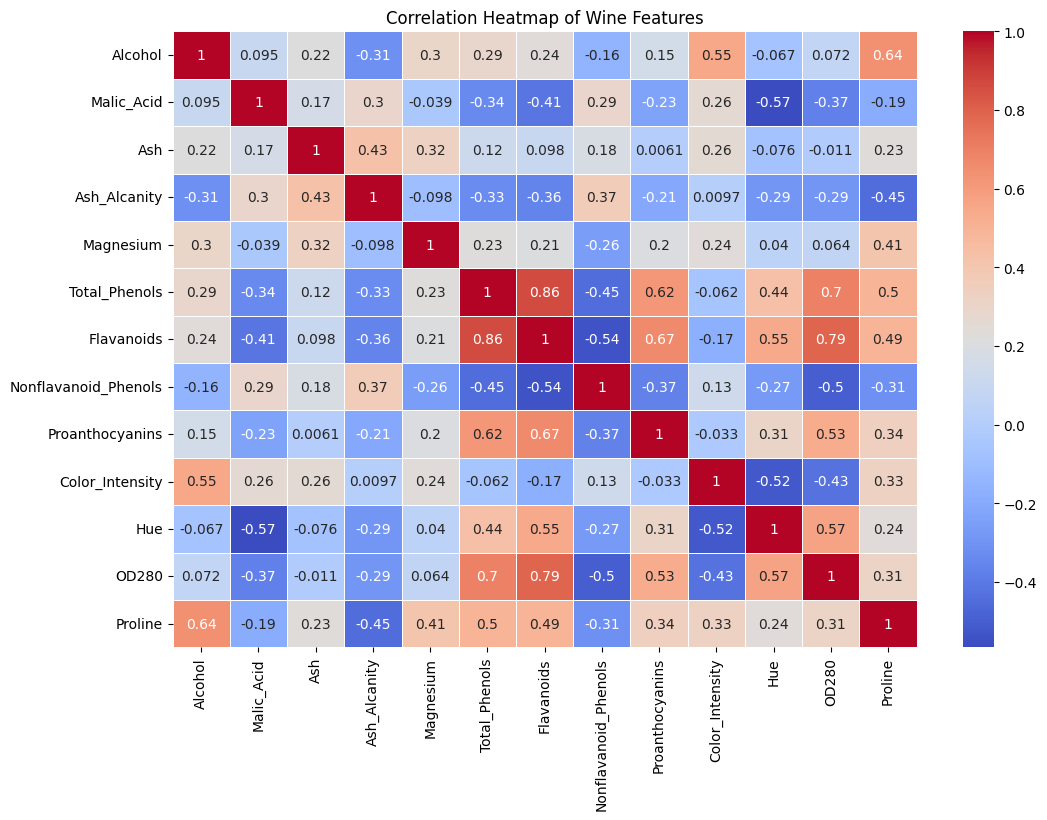

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate analysis: Correlation matrix and heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()



**1. Corrélations Élevées (Multicolinéarité)**

Si deux variables ont une corrélation élevée (proche de 1 ou -1), cela signifie qu'elles contiennent des informations similaires. Dans ton cas :

Flavanoids et Total_Phenols ont une corrélation de 0.86, ce qui est très élevé.

OD280 et Flavanoids ont une corrélation de 0.79, également élevée.

Proline et Alcohol ont une corrélation de 0.64.

Considération : On peut choisir d'exclure certaines variables fortement corrélées pour éviter la redondance dans la matrice des paires. Par exemple, choisir l'une parmi Flavanoids et Total_Phenols.

**2. Corrélations Faibles Des corrélations proches de 0 indiquent une absence de relation linéaire :**


Ash et Proanthocyanins ont une corrélation proche de 0.0097.
Color_Intensity et Magnesium ont une corrélation de 0.055.
Considération : Ces variables peuvent ne pas montrer de relation significative dans la matrice des paires et peuvent être moins intéressantes à analyser ensemble.

**3. Corrélations Négatives Les corrélations négatives montrent des relations inverses :**


Malic_Acid et OD280 ont une corrélation de -0.37, ce qui montre une relation inverse modérée.
Nonflavanoid_Phenols et Flavanoids ont une corrélation de -0.54.
Considération : Ces variables pourraient montrer des tendances intéressantes dans la matrice des paires avec des nuages de points inclinés vers le bas.

**4. Sélection des Variables pour le Pairplot :**

Éviter les variables fortement corrélées pour réduire la redondance.
Sélectionner des variables qui montrent à la fois des corrélations positives et négatives significatives pour voir une variété de relations dans la matrice des paires.

**Conclusion :**

On peut choisir un sous-ensemble de variables pour le pairplot en tenant compte des points suivants:

Inclure Alcohol, Proline, Flavanoids, et Color_Intensity pour observer des corrélations positives significatives.
Inclure Malic_Acid et OD280 pour explorer des corrélations négatives.
Éviter d'inclure à la fois Flavanoids et Total_Phenols à cause de leur forte redondance.

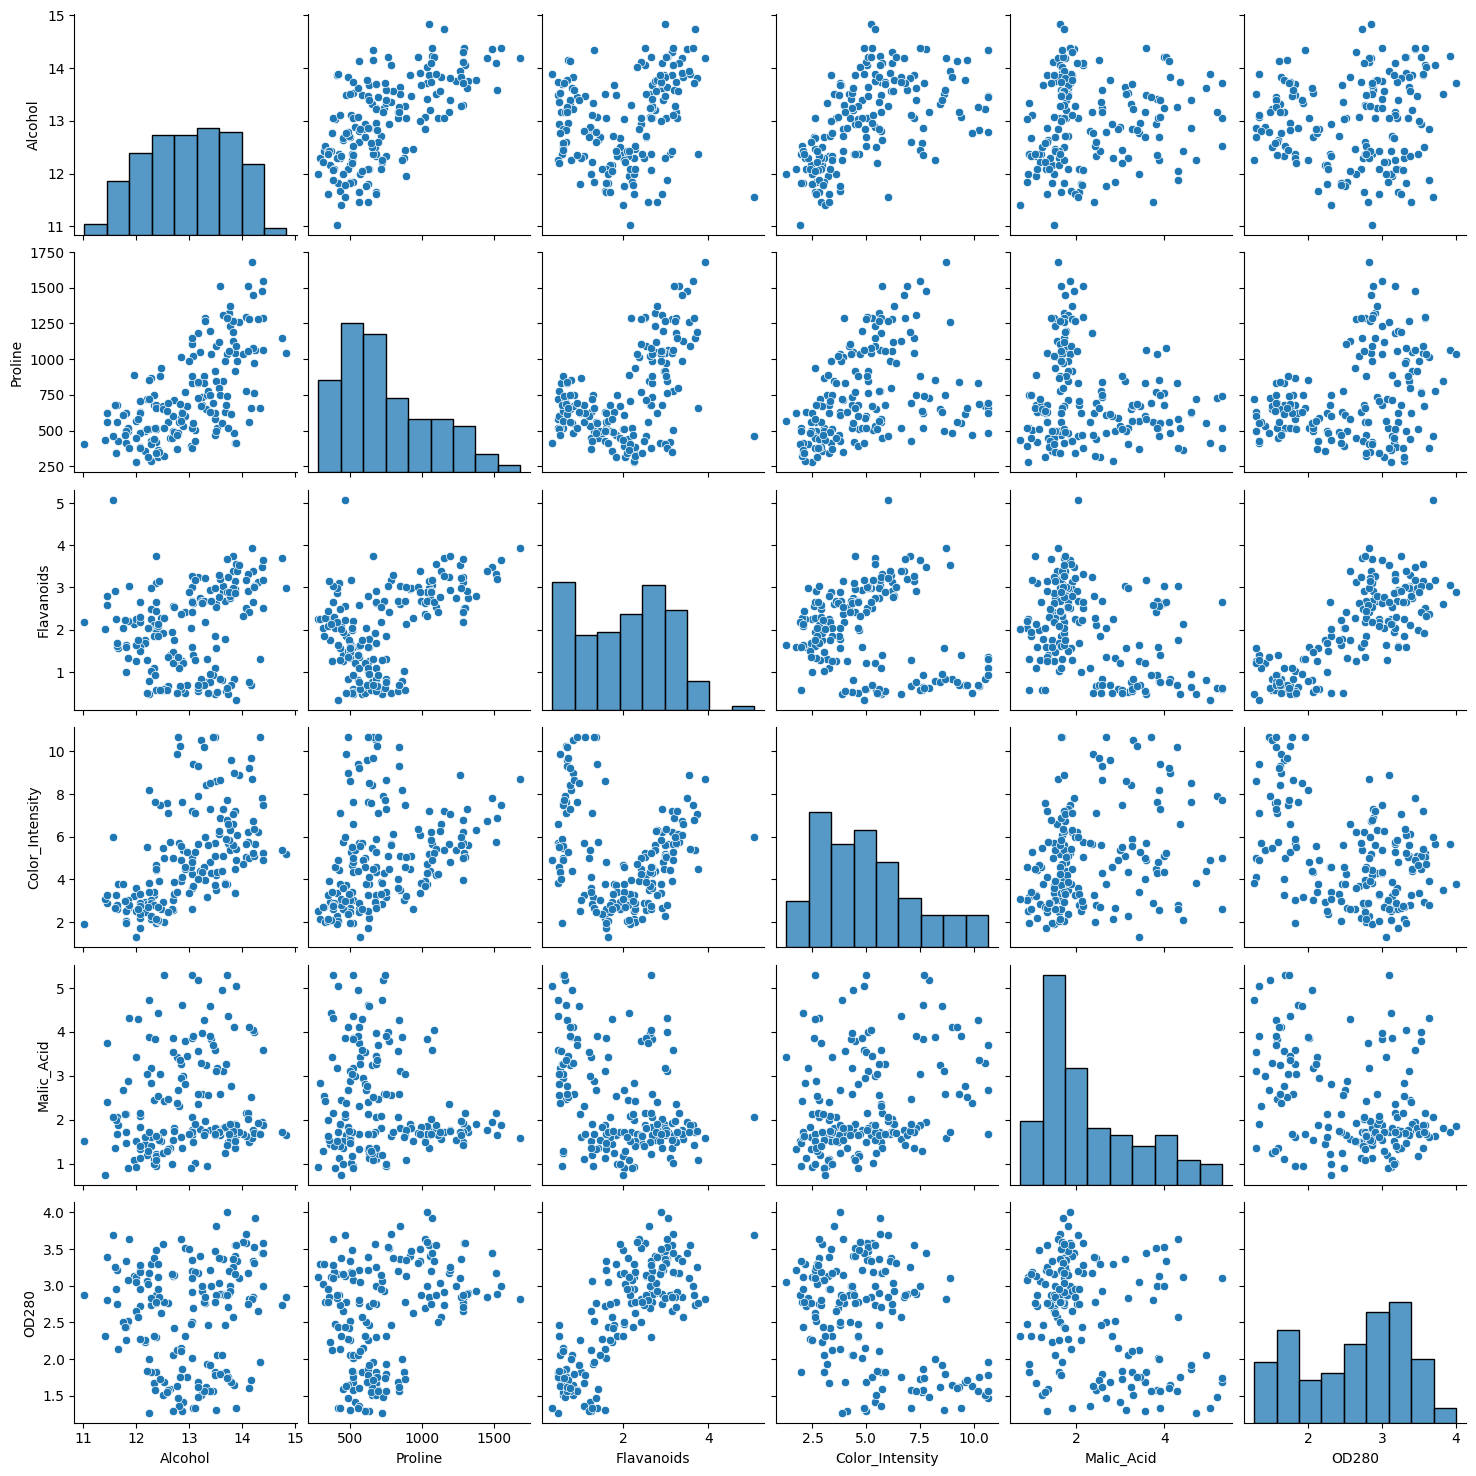

In [148]:
sns.pairplot(df[["Alcohol","Proline","Flavanoids","Color_Intensity","Malic_Acid","OD280"]]) # Changed tuple to list
plt.show()

**Résultats à Retenir :**

Corrélations Fortes et Relations Linéaires :

Il existe des corrélations positives significatives entre certaines variables :

Flavanoids et Total_Phenols (corrélation de 0.86) : Ces deux variables sont très redondantes. Il serait judicieux d'en choisir une seule pour éviter la multicolinéarité.

OD280 et Flavanoids (corrélation de 0.79) : Une relation positive marquée, indiquant que Flavanoids influence fortement l'indice OD280.

Alcohol et Proline (corrélation de 0.64) : Montre une relation positive qui pourrait être utilisée dans des modèles de prédiction.
Absence de Corrélation ou Relations Faibles :


Les variables comme Malic_Acid ont des corrélations faibles avec plusieurs autres variables (Alcohol, Proline). Elles pourraient avoir un impact limité dans les analyses de régression et peuvent potentiellement être exclues si elles n'apportent pas de valeur significative.

Distribution des Variables :

Certaines variables comme Proline et Malic_Acid ont des distributions asymétriques, ce qui pourrait nécessiter une transformation pour les rendre plus normales (ex : transformation logarithmique).

Les histogrammes montrent également la présence de quelques outliers, notamment pour Color_Intensity, qui pourraient influencer l'analyse et nécessiter un nettoyage des données.

Multicolinéarité :

La forte corrélation entre certaines variables (Flavanoids, Total_Phenols, et OD280) suggère une multicolinéarité, ce qui peut poser problème dans les modèles linéaires comme la régression. Une réduction de dimension (ex : PCA) peut être envisagée.

## Standarisation

In [149]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame with numeric columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame (optional)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()  # Display the first few rows of the scaled DataFrame

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


# Features selection (PCA)

In [150]:
from sklearn.decomposition import PCA
pca = PCA()
pca_test = pca.fit_transform(df_scaled)
explained_variance = pca.explained_variance_
total_explained_variance = explained_variance.sum()
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratios)

Plotting a graph of the explained variance ratio of different numbers of PCA Components.

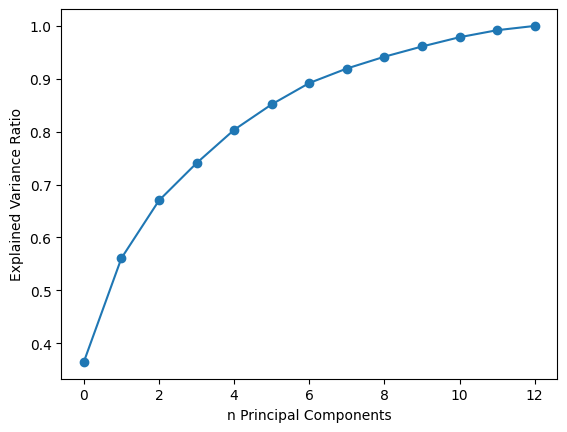

In [151]:
plt.plot(cumulative_variance_ratio, marker = 'o')
plt.xlabel('n Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

It appears that explained variance levels off with ~ 6 components. Our final model will use 6 components, but we will first run PCA with three principal components in order to better visualize the data.

In [152]:
pca_6 = PCA(n_components = 6)
pca_6.fit(df_scaled)
PCA_df = pd.DataFrame(pca_6.transform(df_scaled), columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
PCA_df.head()

,c1,c2,c3,c4,c5,c6
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733


# Elaboration des modèles

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Les données réduites par PCA
df_scaled = PCA_df.copy()


In [154]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import ParameterGrid

# Function to evaluate a clustering model
def evaluate_clustering(model, data, labels):
    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    return silhouette, davies_bouldin, calinski_harabasz

# Dictionary to store the best parameters for each model
best_params = {}
best_scores = {}

# 1. Hyperparameter Tuning for KMeans
kmeans_params = {'n_clusters': range(2, 11), 'init': ['k-means++', 'random'], 'n_init': [10, 20], 'max_iter': [300, 500]}
best_score = -1

for params in ParameterGrid(kmeans_params):
    kmeans = KMeans(**params, random_state=42)
    labels = kmeans.fit_predict(PCA_df)
    silhouette, db_score, ch_score = evaluate_clustering(kmeans, PCA_df, labels)
    if silhouette > best_score:
        best_score = silhouette
        best_params['KMeans'] = params
        best_scores['KMeans'] = (silhouette, db_score, ch_score)

# 2. Hyperparameter Tuning for DBSCAN (with error handling)
best_score = -1
dbscan_params = {'eps': [0.5, 1, 1.5, 2], 'min_samples': [5, 10, 15]}

for params in ParameterGrid(dbscan_params):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(PCA_df)


    # Check if there are at least 2 unique labels (excluding noise)
    unique_labels = set(labels)
    if len(unique_labels) > 1 and -1 in unique_labels:
        # Exclude noise points (label -1) for evaluation
        mask = labels != -1
        if sum(mask) > 0:
            try:
                silhouette, db_score, ch_score = evaluate_clustering(dbscan, PCA_df[mask], labels[mask])
                if silhouette > best_score:
                    best_score = silhouette
                    best_params['DBSCAN'] = params
                    best_scores['DBSCAN'] = (silhouette, db_score, ch_score)
            except Exception as e:
                print(f"Error evaluating DBSCAN with params {params}: {e}")
noise_ratio = (labels == -1).sum() / len(labels)
print(f"Percentage of noise points: {noise_ratio * 100:.2f}%")
# 3. Hyperparameter Tuning for Agglomerative Clustering
agglo_params = {'n_clusters': range(2, 11), 'linkage': ['ward', 'complete', 'average']}
best_score = -1

for params in ParameterGrid(agglo_params):
    agglomerative = AgglomerativeClustering(**params)
    labels = agglomerative.fit_predict(PCA_df)
    silhouette, db_score, ch_score = evaluate_clustering(agglomerative, PCA_df, labels)
    if silhouette > best_score:
        best_score = silhouette
        best_params['AgglomerativeClustering'] = params
        best_scores['AgglomerativeClustering'] = (silhouette, db_score, ch_score)

# 4. Hyperparameter Tuning for GMM
gmm_params = {'n_components': range(2, 11), 'covariance_type': ['full', 'tied', 'diag', 'spherical']}
best_score = -1

for params in ParameterGrid(gmm_params):
    gmm = GaussianMixture(**params, random_state=42)
    labels = gmm.fit_predict(PCA_df)
    silhouette, db_score, ch_score = evaluate_clustering(gmm, PCA_df, labels)
    if silhouette > best_score:
        best_score = silhouette
        best_params['GaussianMixture'] = params
        best_scores['GaussianMixture'] = (silhouette, db_score, ch_score)

# 5. Hyperparameter Tuning for BIRCH
birch_params = {'n_clusters': range(2, 11), 'threshold': [0.5, 1, 1.5, 2]}
best_score = -1

for params in ParameterGrid(birch_params):
    birch = Birch(**params)
    labels = birch.fit_predict(PCA_df)
    silhouette, db_score, ch_score = evaluate_clustering(birch, PCA_df, labels)
    if silhouette > best_score:
        best_score = silhouette
        best_params['BIRCH'] = params
        best_scores['BIRCH'] = (silhouette, db_score, ch_score)

# Display the best parameters and scores
import pandas as pd

results = pd.DataFrame({
    'Model': list(best_params.keys()),
    'Best Parameters': list(best_params.values()),
    'Silhouette Score': [score[0] for score in best_scores.values()],
    'Davies-Bouldin Score': [score[1] for score in best_scores.values()],
    'Calinski-Harabasz Score': [score[2] for score in best_scores.values()]
})

# Display the results
from IPython.display import display
display(results)


Error evaluating DBSCAN with params {'eps': 1.5, 'min_samples': 15}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Error evaluating DBSCAN with params {'eps': 2, 'min_samples': 5}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Percentage of noise points: 23.60%


,Model,Best Parameters,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.345719,1.151019,99.056198
1,DBSCAN,"{'eps': 1, 'min_samples': 5}",0.482116,0.720301,14.629417
2,AgglomerativeClustering,"{'linkage': 'ward', 'n_clusters': 3}",0.340378,1.171293,96.991639
3,GaussianMixture,"{'covariance_type': 'tied', 'n_components': 3}",0.344133,1.162272,97.226104
4,BIRCH,"{'n_clusters': 3, 'threshold': 0.5}",0.338897,1.157332,96.026209


In [155]:
# Entraîner DBSCAN avec eps=0.5 et min_samples=2
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Filtrer les points de bruit (-1) pour le calcul des métriques
mask = dbscan_labels != -1

# Calcul des métriques pour DBSCAN
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled[mask], dbscan_labels[mask])
    dbscan_davies_bouldin = davies_bouldin_score(df_scaled[mask], dbscan_labels[mask])
    dbscan_calinski_harabasz = calinski_harabasz_score(df_scaled[mask], dbscan_labels[mask])
else:
    dbscan_silhouette, dbscan_davies_bouldin, dbscan_calinski_harabasz = None, None, None
noise_ratio = (dbscan_labels == -1).sum() / len(labels)
print(f"Percentage of noise points: {noise_ratio * 100:.2f}%")

Percentage of noise points: 100.00%


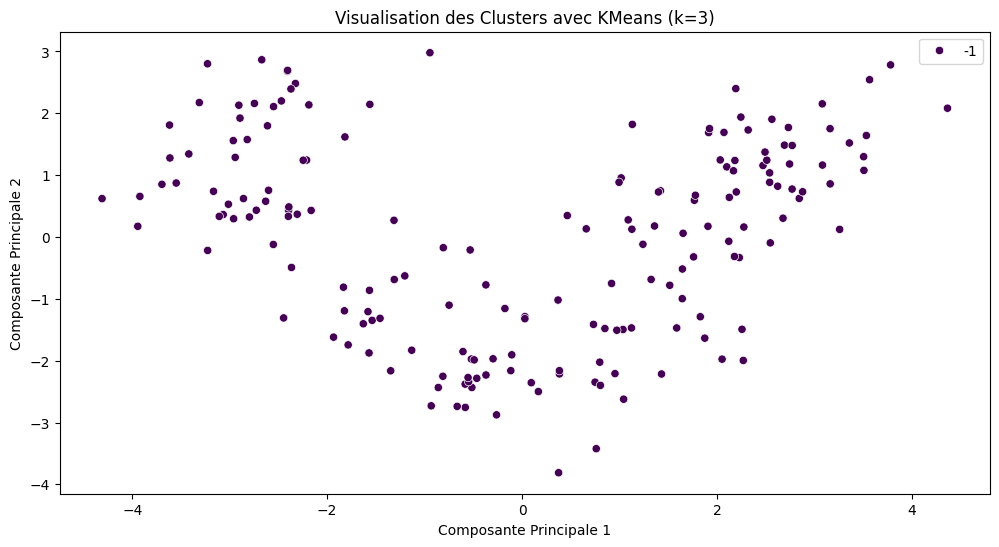

In [156]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=PCA_df['c1'], y=PCA_df['c2'], hue=dbscan_labels, palette='viridis', legend='full')
plt.title('Visualisation des Clusters avec KMeans (k=3)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()


Lorsque DBSCAN détecte 100% de bruit, cela signifie que l'algorithme n'a trouvé aucun cluster valide pour les paramètres choisis (eps et min_samples).

## Problème :

Tous les points sont considérés comme du bruit (label = -1).

In [157]:
# Entraîner KMeans avec k=3
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++',max_iter=300,n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)
df['KMeans_Clusters'] = kmeans_labels

# Calcul des métriques
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(df_scaled, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(df_scaled, kmeans_labels)


In [158]:
# Entraîner AgglomerativeClustering avec n_clusters=3
cah = AgglomerativeClustering(n_clusters=3,linkage='ward')
cah_labels = cah.fit_predict(df_scaled)

# Calcul des métriques
cah_silhouette = silhouette_score(df_scaled, cah_labels)
cah_davies_bouldin = davies_bouldin_score(df_scaled, cah_labels)
cah_calinski_harabasz = calinski_harabasz_score(df_scaled, cah_labels)


In [159]:
# Entraîner GMM avec n_components=3
gmm = GaussianMixture(n_components=3, random_state=42, covariance_type="tied")
gmm_labels = gmm.fit_predict(df_scaled)

# Calcul des métriques
gmm_silhouette = silhouette_score(df_scaled, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(df_scaled, gmm_labels)
gmm_calinski_harabasz = calinski_harabasz_score(df_scaled, gmm_labels)


In [160]:
# Entraîner BIRCH avec n_clusters=3
birch = Birch(n_clusters=3,threshold=0.5)
birch_labels = birch.fit_predict(df_scaled)

# Calcul des métriques
birch_silhouette = silhouette_score(df_scaled, birch_labels)
birch_davies_bouldin = davies_bouldin_score(df_scaled, birch_labels)
birch_calinski_harabasz = calinski_harabasz_score(df_scaled, birch_labels)


In [162]:
results = results[results['Model'] != 'DBSCAN']
results

,Model,Best Parameters,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,KMeans,"{'init': 'k-means++', 'max_iter': 300, 'n_clus...",0.345719,1.151019,99.056198
2,AgglomerativeClustering,"{'linkage': 'ward', 'n_clusters': 3}",0.340378,1.171293,96.991639
3,GaussianMixture,"{'covariance_type': 'tied', 'n_components': 3}",0.344133,1.162272,97.226104
4,BIRCH,"{'n_clusters': 3, 'threshold': 0.5}",0.338897,1.157332,96.026209


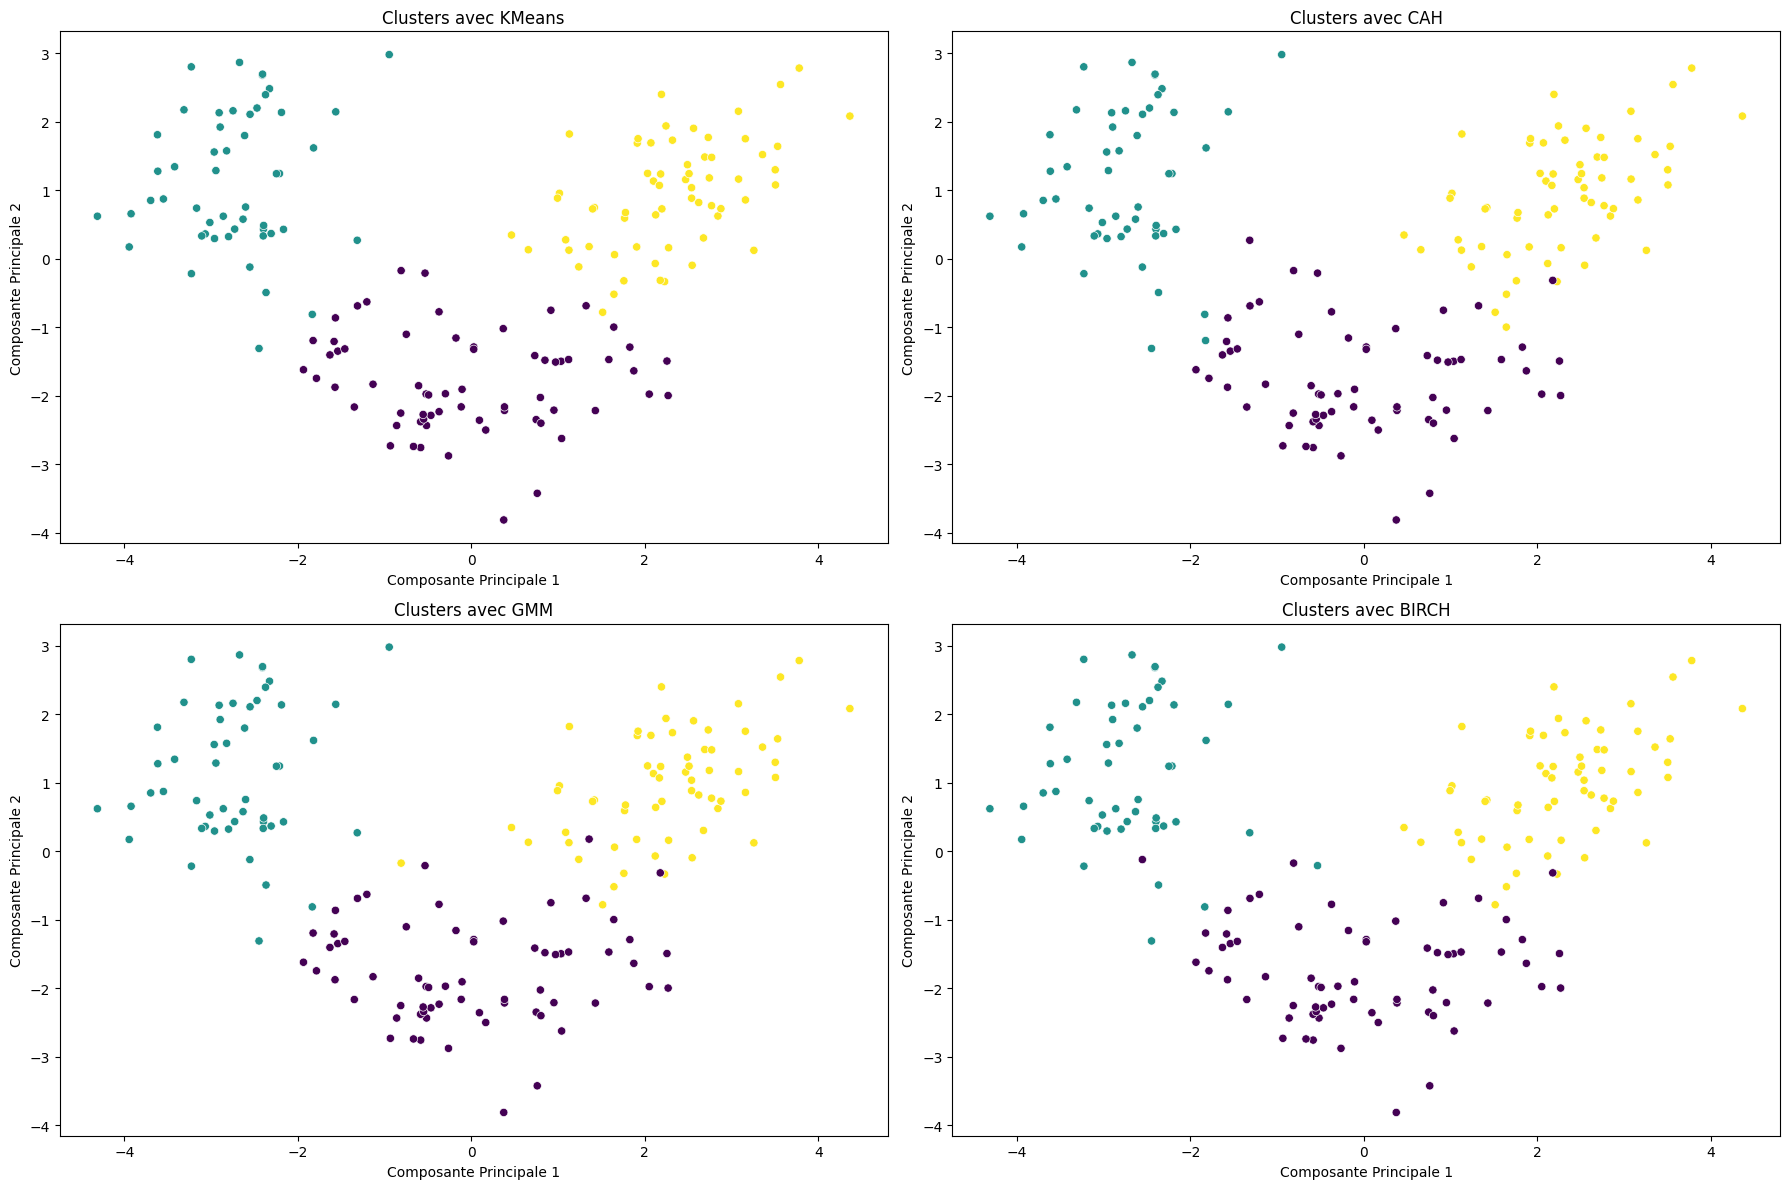

In [163]:
# Visualiser les clusters pour chaque modèle
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

models = [
    ('KMeans', kmeans_labels),
    ('CAH', cah_labels),
    ('GMM', gmm_labels),
    ('BIRCH', birch_labels)
]

for ax, (name, labels) in zip(axes.flat, models):
    sns.scatterplot(x=PCA_df['c1'], y=PCA_df['c2'], hue=labels, palette='viridis', ax=ax, legend=None)
    ax.set_title(f'Clusters avec {name}')
    ax.set_xlabel('Composante Principale 1')
    ax.set_ylabel('Composante Principale 2')

plt.tight_layout()
plt.show()


**Nous avons choisi *KMeans* comme le meilleur modèle de clustering pour nos données. Après analyse des métriques et des visualisations, il apparaît que KMeans est le plus adapté pour fournir des clusters bien définis et facilement interprétables. En effet, KMeans a obtenu des scores élevés sur les indicateurs de performance, notamment le *Calinski-Harabasz Score, ce qui indique que les clusters formés sont denses et bien séparés. Contrairement à DBSCAN, qui a classé tous les points comme bruit (avec un noise ratio* de 100%), KMeans permet de segmenter efficacement les données en trois groupes distincts, comme montré dans les visualisations. Sa simplicité, sa rapidité d'exécution, et sa capacité à former des clusters compacts en font un choix idéal pour nos besoins. Par conséquent, KMeans est le modèle le plus pertinent pour cette analyse.**

# Déploiement

In [164]:
import pickle

# Assuming 'kmeans' is your trained KMeans model
# Replace 'kmeans' with the variable name of your model

# Save the model to a file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# You can now download this file from the Colab environment and use it to make predictions in another environment.

# Enregistrer le scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Enregistrer le PCA
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca_6, f)

In [165]:
def load_and_predict(input_data, model_path='kmeans_model.pkl', scaler_path='scaler.pkl', pca_path='pca.pkl'):
    """
    Charge un modèle KMeans pré-entraîné, un scaler et un PCA, puis prédit les clusters pour de nouvelles données.

    Args:
        input_data: Un DataFrame pandas contenant les données d'entrée pour la prédiction.
        model_path: Chemin vers le fichier du modèle KMeans picklé.
        scaler_path: Chemin vers le fichier du scaler picklé.
        pca_path: Chemin vers le fichier du PCA picklé.

    Returns:
        Une liste des affectations de clusters pour les données d'entrée.
    """
    import pickle
    import pandas as pd

    # Charger le modèle KMeans pré-entraîné
    with open(model_path, 'rb') as f:
        kmeans_model = pickle.load(f)

    # Charger le scaler pré-entraîné
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)

    # Charger le PCA pré-entraîné
    with open(pca_path, 'rb') as f:
        pca = pickle.load(f)

    # Vérifier les colonnes et réorganiser
    expected_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
                        'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
                        'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
    if not all(column in input_data.columns for column in expected_columns):
        missing_cols = set(expected_columns) - set(input_data.columns)
        raise ValueError(f"Les données d'entrée doivent contenir les colonnes suivantes : {missing_cols}")

    input_data = input_data[expected_columns]

    # Prétraiter les données d'entrée
    input_data_scaled_array = scaler.transform(input_data)
    input_data_scaled = pd.DataFrame(input_data_scaled_array, columns=expected_columns)

    # Appliquer le PCA
    pca_input_data_array = pca.transform(input_data_scaled)
    pca_columns = [f'c{i+1}' for i in range(pca.n_components_)]
    pca_input_data = pd.DataFrame(pca_input_data_array, columns=pca_columns)

    # Prédire les clusters
    cluster_labels = kmeans_model.predict(pca_input_data)

    return cluster_labels

new_data = pd.DataFrame({
    'Alcohol': [13.2],
    'Malic_Acid': [1.78],
    'Ash': [2.14],
    'Ash_Alcanity': [11.2],
    'Magnesium': [100.0],
    'Total_Phenols': [2.65],
    'Flavanoids': [2.78],
    'Nonflavanoid_Phenols': [0.26],
    'Proanthocyanins': [1.28],
    'Color_Intensity': [4.38],
    'Hue': [1.05],
    'OD280': [3.4],
    'Proline': [1050.0]
})
cluster_labels = load_and_predict(new_data)
print(cluster_labels)


[2]


In [166]:
# Vérifier le nombre de clusters du modèle chargé
with open('kmeans_model.pkl', 'rb') as f:
    kmeans_model = pickle.load(f)
print(f"Nombre de clusters dans le modèle KMeans chargé : {kmeans_model.n_clusters}")


Nombre de clusters dans le modèle KMeans chargé : 3
